In [1]:
import sys
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Lấy đường dẫn tuyệt đối của thư mục hiện tại (notebooks)
current_dir = os.getcwd()

# 2. Lấy đường dẫn của thư mục cha (MODELS)
project_root = os.path.dirname(current_dir)

# 3. Thêm thư mục cha vào hệ thống tìm kiếm module của Python
if project_root not in sys.path:
    sys.path.append(project_root)

# Kiểm tra xem đã thêm đúng chưa (Optional)
print(f"Project Root added: {project_root}")

from models.utils.loader import *
from models.utils.visualize import *
from models.metrics import *
from models.softmax_regression import *
from models.model_pixel import PixelSoftmax
from models.model_edge import EdgeSoftmax
from models.model_pca import PCASoftmax
from models.model_block import BlockSoftmax
from models.model_hog import HOGSoftmax
from models.softmax_regression import SoftmaxRegression
from models.metrics import confusion_matrix, accuracy, f1_score
from models.utils.visualize import *

Project Root added: d:\ML\Lab02\MODELS


In [2]:
# Load dataset and split into train, validation, test sets

datapath = os.path.join(project_root, 'data/mnist_data.npz')
X_train, y_train, X_test, y_test = load_dataset(datapath)

print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

def train_val_split(X: np.ndarray, y: np.ndarray, val_size: float = 0.1, random_seed: int = 42):
    np.random.seed(random_seed)
    N = X.shape[0]
    indices = np.random.permutation(N)
    val_count = int(N * val_size)
    val_indices = indices[:val_count]
    train_indices = indices[val_count:]
    return X[train_indices], X[val_indices], y[train_indices], y[val_indices]

X_train, X_val, y_train, y_val = train_val_split(X_train, y_train)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


In [3]:
TRAIN_CONFIG = {
    'batch_size': X_train.shape[0],
    'verbose': True,
    'epochs': 125
}

models = {
    "Pixel (Baseline)": PixelSoftmax(
        num_features=784, 
        num_classes=10, 
        optimizer=Adam()
    ),
    
    "Edge (Sobel)": EdgeSoftmax(
        num_features=784, 
        num_classes=10, 
        optimizer=Adam()
    ),
    
    "Block (14x14)": BlockSoftmax(
        grid_size=(14, 14), 
        num_classes=10, 
        optimizer=Adam()
    ),
    
    "PCA (k=64)": PCASoftmax(
        num_features=64,
        num_classes=10, 
        optimizer=Adam()
    ),
    
    "HOG": HOGSoftmax(
        bins=9, 
        cell_grid=(7, 7), 
        num_classes=10, 
        optimizer=Adam()
    )
}

model_lrs = {
    "Pixel (Baseline)": 0.01,
    "Edge (Sobel)": 0.002,
    "Block (14x14)": 0.05,
    "PCA (k=64)": 0.05,
    "HOG": 0.2
}

In [4]:
# TRAINING AND EVALUATION LOOP

results = []
train_loss = {} # Model loss history
valid_loss = {} # Model validation loss history

for name, model in models.items():
    print(f"Training Model: {name}")

    lr = model_lrs[name]

    start_time = time.time()

    # # Start training
    model.fit(X_train, y_train, X_val=X_val, y_val=y_val, learning_rate=lr, **TRAIN_CONFIG)

    train_time = time.time() - start_time

    # 2. Evaluate on test set
    y_pred = model.predict(X_test)
    test_acc = accuracy(y_test, y_pred)

    # 3. Store results
    results.append({
        "Model": name,
        "Accuracy": test_acc,
        "Precision": precision_score(y_test, y_pred, num_classes=10, average='macro'),
        "Recall": recall_score(y_test, y_pred, num_classes=10, average='macro'),
        "F1-Score": f1_score(y_test, y_pred, num_classes=10, average='macro'),
        "Time (s)": train_time,
        "Num Features": model.num_features
    })

    # Store loss history
    train_loss[name] = model.loss_history
    valid_loss[name] = model.acc_history

print(f"\n{'='*20} BENCHMARK COMPLETED {'='*20}")

Training Model: Pixel (Baseline)


Output()

Epoch 1/125 - Validation Accuracy: 63.48%

Epoch 2/125 - Validation Accuracy: 72.68%

Epoch 3/125 - Validation Accuracy: 78.25%

Epoch 4/125 - Validation Accuracy: 79.83%

Epoch 5/125 - Validation Accuracy: 80.57%

Epoch 6/125 - Validation Accuracy: 81.08%

Epoch 7/125 - Validation Accuracy: 81.68%

Epoch 8/125 - Validation Accuracy: 82.52%

Epoch 9/125 - Validation Accuracy: 83.33%

Epoch 10/125 - Validation Accuracy: 84.32%

Epoch 11/125 - Validation Accuracy: 85.10%

Epoch 12/125 - Validation Accuracy: 85.68%

Epoch 13/125 - Validation Accuracy: 86.13%

Epoch 14/125 - Validation Accuracy: 86.35%

Epoch 15/125 - Validation Accuracy: 86.67%

Epoch 16/125 - Validation Accuracy: 87.17%

Epoch 17/125 - Validation Accuracy: 87.48%

Epoch 18/125 - Validation Accuracy: 87.88%

Epoch 19/125 - Validation Accuracy: 88.20%

Epoch 20/125 - Validation Accuracy: 88.43%

Epoch 21/125 - Validation Accuracy: 88.72%

Epoch 22/125 - Validation Accuracy: 88.78%

Epoch 23/125 - Validation Accuracy: 88.80%

Epoch 24/125 - Validation Accuracy: 88.82%

Epoch 25/125 - Validation Accuracy: 88.93%

Epoch 26/125 - Validation Accuracy: 89.13%

Epoch 27/125 - Validation Accuracy: 89.30%

Epoch 28/125 - Validation Accuracy: 89.48%

Epoch 29/125 - Validation Accuracy: 89.48%

Epoch 30/125 - Validation Accuracy: 89.60%

Epoch 31/125 - Validation Accuracy: 89.67%

Epoch 32/125 - Validation Accuracy: 89.75%

Epoch 33/125 - Validation Accuracy: 89.80%

Epoch 34/125 - Validation Accuracy: 89.97%

Epoch 35/125 - Validation Accuracy: 90.05%

Epoch 36/125 - Validation Accuracy: 90.10%

Epoch 37/125 - Validation Accuracy: 90.17%

Epoch 38/125 - Validation Accuracy: 90.27%

Epoch 39/125 - Validation Accuracy: 90.43%

Epoch 40/125 - Validation Accuracy: 90.42%

Epoch 41/125 - Validation Accuracy: 90.48%

Epoch 42/125 - Validation Accuracy: 90.55%

Epoch 43/125 - Validation Accuracy: 90.63%

Epoch 44/125 - Validation Accuracy: 90.82%

Epoch 45/125 - Validation Accuracy: 90.92%

Epoch 46/125 - Validation Accuracy: 90.92%

Epoch 47/125 - Validation Accuracy: 90.98%

Epoch 48/125 - Validation Accuracy: 91.05%

Epoch 49/125 - Validation Accuracy: 91.12%

Epoch 50/125 - Validation Accuracy: 91.08%

Epoch 51/125 - Validation Accuracy: 91.08%

Epoch 52/125 - Validation Accuracy: 91.17%

Epoch 53/125 - Validation Accuracy: 91.22%

Epoch 54/125 - Validation Accuracy: 91.28%

Epoch 55/125 - Validation Accuracy: 91.35%

Epoch 56/125 - Validation Accuracy: 91.42%

Epoch 57/125 - Validation Accuracy: 91.47%

Epoch 58/125 - Validation Accuracy: 91.47%

Epoch 59/125 - Validation Accuracy: 91.55%

Epoch 60/125 - Validation Accuracy: 91.58%

Epoch 61/125 - Validation Accuracy: 91.62%

Epoch 62/125 - Validation Accuracy: 91.63%

Epoch 63/125 - Validation Accuracy: 91.67%

Epoch 64/125 - Validation Accuracy: 91.68%

Epoch 65/125 - Validation Accuracy: 91.67%

Epoch 66/125 - Validation Accuracy: 91.68%

Epoch 67/125 - Validation Accuracy: 91.75%

Epoch 68/125 - Validation Accuracy: 91.75%

Epoch 69/125 - Validation Accuracy: 91.75%

Epoch 70/125 - Validation Accuracy: 91.78%

Epoch 71/125 - Validation Accuracy: 91.82%

Epoch 72/125 - Validation Accuracy: 91.87%

Epoch 73/125 - Validation Accuracy: 91.88%

Epoch 74/125 - Validation Accuracy: 91.95%

Epoch 75/125 - Validation Accuracy: 92.00%

Epoch 76/125 - Validation Accuracy: 92.02%

Epoch 77/125 - Validation Accuracy: 92.02%

Epoch 78/125 - Validation Accuracy: 92.03%

Epoch 79/125 - Validation Accuracy: 92.02%

Epoch 80/125 - Validation Accuracy: 92.02%

Epoch 81/125 - Validation Accuracy: 92.00%

Epoch 82/125 - Validation Accuracy: 92.10%

Epoch 83/125 - Validation Accuracy: 92.08%

Epoch 84/125 - Validation Accuracy: 92.13%

Epoch 85/125 - Validation Accuracy: 92.15%

Epoch 86/125 - Validation Accuracy: 92.17%

Epoch 87/125 - Validation Accuracy: 92.17%

Epoch 88/125 - Validation Accuracy: 92.17%

Epoch 89/125 - Validation Accuracy: 92.17%

Epoch 90/125 - Validation Accuracy: 92.17%

Epoch 91/125 - Validation Accuracy: 92.13%

Epoch 92/125 - Validation Accuracy: 92.13%

Epoch 93/125 - Validation Accuracy: 92.13%

Epoch 94/125 - Validation Accuracy: 92.17%

Epoch 95/125 - Validation Accuracy: 92.17%

Epoch 96/125 - Validation Accuracy: 92.20%

Epoch 97/125 - Validation Accuracy: 92.22%

Epoch 98/125 - Validation Accuracy: 92.22%

Epoch 99/125 - Validation Accuracy: 92.23%

Epoch 100/125 - Validation Accuracy: 92.27%

Epoch 101/125 - Validation Accuracy: 92.33%

Epoch 102/125 - Validation Accuracy: 92.35%

Epoch 103/125 - Validation Accuracy: 92.40%

Epoch 104/125 - Validation Accuracy: 92.40%

Epoch 105/125 - Validation Accuracy: 92.42%

Epoch 106/125 - Validation Accuracy: 92.40%

Epoch 107/125 - Validation Accuracy: 92.43%

Epoch 108/125 - Validation Accuracy: 92.45%

Epoch 109/125 - Validation Accuracy: 92.47%

Epoch 110/125 - Validation Accuracy: 92.47%

Epoch 111/125 - Validation Accuracy: 92.48%

Epoch 112/125 - Validation Accuracy: 92.48%

Epoch 113/125 - Validation Accuracy: 92.50%

Epoch 114/125 - Validation Accuracy: 92.48%

Epoch 115/125 - Validation Accuracy: 92.52%

Epoch 116/125 - Validation Accuracy: 92.53%

Epoch 117/125 - Validation Accuracy: 92.55%

Epoch 118/125 - Validation Accuracy: 92.53%

Epoch 119/125 - Validation Accuracy: 92.53%

Epoch 120/125 - Validation Accuracy: 92.53%

Epoch 121/125 - Validation Accuracy: 92.55%

Epoch 122/125 - Validation Accuracy: 92.57%

Epoch 123/125 - Validation Accuracy: 92.55%

Epoch 124/125 - Validation Accuracy: 92.55%

Epoch 125/125 - Validation Accuracy: 92.57%

Training Model: Edge (Sobel)
Feature Extraction: Computing Sobel Edges...


Output()

Epoch 1/125 - Validation Accuracy: 49.50%

Epoch 2/125 - Validation Accuracy: 71.85%

Epoch 3/125 - Validation Accuracy: 74.57%

Epoch 4/125 - Validation Accuracy: 76.65%

Epoch 5/125 - Validation Accuracy: 75.53%

Epoch 6/125 - Validation Accuracy: 76.10%

Epoch 7/125 - Validation Accuracy: 77.43%

Epoch 8/125 - Validation Accuracy: 78.83%

Epoch 9/125 - Validation Accuracy: 79.75%

Epoch 10/125 - Validation Accuracy: 80.57%

Epoch 11/125 - Validation Accuracy: 81.05%

Epoch 12/125 - Validation Accuracy: 81.62%

Epoch 13/125 - Validation Accuracy: 82.07%

Epoch 14/125 - Validation Accuracy: 82.62%

Epoch 15/125 - Validation Accuracy: 83.00%

Epoch 16/125 - Validation Accuracy: 83.62%

Epoch 17/125 - Validation Accuracy: 83.72%

Epoch 18/125 - Validation Accuracy: 84.18%

Epoch 19/125 - Validation Accuracy: 84.32%

Epoch 20/125 - Validation Accuracy: 84.45%

Epoch 21/125 - Validation Accuracy: 84.73%

Epoch 22/125 - Validation Accuracy: 84.82%

Epoch 23/125 - Validation Accuracy: 84.98%

Epoch 24/125 - Validation Accuracy: 85.18%

Epoch 25/125 - Validation Accuracy: 85.28%

Epoch 26/125 - Validation Accuracy: 85.42%

Epoch 27/125 - Validation Accuracy: 85.45%

Epoch 28/125 - Validation Accuracy: 85.73%

Epoch 29/125 - Validation Accuracy: 85.85%

Epoch 30/125 - Validation Accuracy: 85.95%

Epoch 31/125 - Validation Accuracy: 86.05%

Epoch 32/125 - Validation Accuracy: 86.10%

Epoch 33/125 - Validation Accuracy: 86.18%

Epoch 34/125 - Validation Accuracy: 86.22%

Epoch 35/125 - Validation Accuracy: 86.30%

Epoch 36/125 - Validation Accuracy: 86.38%

Epoch 37/125 - Validation Accuracy: 86.53%

Epoch 38/125 - Validation Accuracy: 86.55%

Epoch 39/125 - Validation Accuracy: 86.57%

Epoch 40/125 - Validation Accuracy: 86.53%

Epoch 41/125 - Validation Accuracy: 86.73%

Epoch 42/125 - Validation Accuracy: 86.78%

Epoch 43/125 - Validation Accuracy: 86.77%

Epoch 44/125 - Validation Accuracy: 86.87%

Epoch 45/125 - Validation Accuracy: 86.93%

Epoch 46/125 - Validation Accuracy: 87.03%

Epoch 47/125 - Validation Accuracy: 87.05%

Epoch 48/125 - Validation Accuracy: 87.05%

Epoch 49/125 - Validation Accuracy: 87.15%

Epoch 50/125 - Validation Accuracy: 87.18%

Epoch 51/125 - Validation Accuracy: 87.28%

Epoch 52/125 - Validation Accuracy: 87.32%

Epoch 53/125 - Validation Accuracy: 87.43%

Epoch 54/125 - Validation Accuracy: 87.50%

Epoch 55/125 - Validation Accuracy: 87.48%

Epoch 56/125 - Validation Accuracy: 87.50%

Epoch 57/125 - Validation Accuracy: 87.52%

Epoch 58/125 - Validation Accuracy: 87.58%

Epoch 59/125 - Validation Accuracy: 87.67%

Epoch 60/125 - Validation Accuracy: 87.78%

Epoch 61/125 - Validation Accuracy: 87.87%

Epoch 62/125 - Validation Accuracy: 87.88%

Epoch 63/125 - Validation Accuracy: 87.98%

Epoch 64/125 - Validation Accuracy: 88.10%

Epoch 65/125 - Validation Accuracy: 88.13%

Epoch 66/125 - Validation Accuracy: 88.17%

Epoch 67/125 - Validation Accuracy: 88.18%

Epoch 68/125 - Validation Accuracy: 88.20%

Epoch 69/125 - Validation Accuracy: 88.18%

Epoch 70/125 - Validation Accuracy: 88.22%

Epoch 71/125 - Validation Accuracy: 88.27%

Epoch 72/125 - Validation Accuracy: 88.27%

Epoch 73/125 - Validation Accuracy: 88.27%

Epoch 74/125 - Validation Accuracy: 88.25%

Epoch 75/125 - Validation Accuracy: 88.28%

Epoch 76/125 - Validation Accuracy: 88.27%

Epoch 77/125 - Validation Accuracy: 88.30%

Epoch 78/125 - Validation Accuracy: 88.35%

Epoch 79/125 - Validation Accuracy: 88.38%

Epoch 80/125 - Validation Accuracy: 88.42%

Epoch 81/125 - Validation Accuracy: 88.43%

Epoch 82/125 - Validation Accuracy: 88.48%

Epoch 83/125 - Validation Accuracy: 88.45%

Epoch 84/125 - Validation Accuracy: 88.48%

Epoch 85/125 - Validation Accuracy: 88.52%

Epoch 86/125 - Validation Accuracy: 88.52%

Epoch 87/125 - Validation Accuracy: 88.55%

Epoch 88/125 - Validation Accuracy: 88.57%

Epoch 89/125 - Validation Accuracy: 88.53%

Epoch 90/125 - Validation Accuracy: 88.58%

Epoch 91/125 - Validation Accuracy: 88.58%

Epoch 92/125 - Validation Accuracy: 88.60%

Epoch 93/125 - Validation Accuracy: 88.60%

Epoch 94/125 - Validation Accuracy: 88.60%

Epoch 95/125 - Validation Accuracy: 88.63%

Epoch 96/125 - Validation Accuracy: 88.67%

Epoch 97/125 - Validation Accuracy: 88.67%

Epoch 98/125 - Validation Accuracy: 88.67%

Epoch 99/125 - Validation Accuracy: 88.68%

Epoch 100/125 - Validation Accuracy: 88.72%

Epoch 101/125 - Validation Accuracy: 88.73%

Epoch 102/125 - Validation Accuracy: 88.73%

Epoch 103/125 - Validation Accuracy: 88.73%

Epoch 104/125 - Validation Accuracy: 88.75%

Epoch 105/125 - Validation Accuracy: 88.75%

Epoch 106/125 - Validation Accuracy: 88.80%

Epoch 107/125 - Validation Accuracy: 88.80%

Epoch 108/125 - Validation Accuracy: 88.83%

Epoch 109/125 - Validation Accuracy: 88.85%

Epoch 110/125 - Validation Accuracy: 88.87%

Epoch 111/125 - Validation Accuracy: 88.83%

Epoch 112/125 - Validation Accuracy: 88.85%

Epoch 113/125 - Validation Accuracy: 88.85%

Epoch 114/125 - Validation Accuracy: 88.88%

Epoch 115/125 - Validation Accuracy: 88.87%

Epoch 116/125 - Validation Accuracy: 88.87%

Epoch 117/125 - Validation Accuracy: 88.88%

Epoch 118/125 - Validation Accuracy: 88.88%

Epoch 119/125 - Validation Accuracy: 88.88%

Epoch 120/125 - Validation Accuracy: 88.90%

Epoch 121/125 - Validation Accuracy: 88.90%

Epoch 122/125 - Validation Accuracy: 88.90%

Epoch 123/125 - Validation Accuracy: 88.90%

Epoch 124/125 - Validation Accuracy: 88.97%

Epoch 125/125 - Validation Accuracy: 89.00%

Training Model: Block (14x14)
Applying Block Averaging (14, 14)...
Block Feature shape: (54000, 196)


Output()

Epoch 1/125 - Validation Accuracy: 64.88%

Epoch 2/125 - Validation Accuracy: 74.60%

Epoch 3/125 - Validation Accuracy: 79.52%

Epoch 4/125 - Validation Accuracy: 80.53%

Epoch 5/125 - Validation Accuracy: 80.68%

Epoch 6/125 - Validation Accuracy: 81.32%

Epoch 7/125 - Validation Accuracy: 82.42%

Epoch 8/125 - Validation Accuracy: 83.65%

Epoch 9/125 - Validation Accuracy: 84.67%

Epoch 10/125 - Validation Accuracy: 85.57%

Epoch 11/125 - Validation Accuracy: 85.92%

Epoch 12/125 - Validation Accuracy: 86.30%

Epoch 13/125 - Validation Accuracy: 86.67%

Epoch 14/125 - Validation Accuracy: 87.13%

Epoch 15/125 - Validation Accuracy: 87.40%

Epoch 16/125 - Validation Accuracy: 87.67%

Epoch 17/125 - Validation Accuracy: 88.00%

Epoch 18/125 - Validation Accuracy: 88.22%

Epoch 19/125 - Validation Accuracy: 88.48%

Epoch 20/125 - Validation Accuracy: 88.67%

Epoch 21/125 - Validation Accuracy: 88.78%

Epoch 22/125 - Validation Accuracy: 88.97%

Epoch 23/125 - Validation Accuracy: 89.02%

Epoch 24/125 - Validation Accuracy: 89.23%

Epoch 25/125 - Validation Accuracy: 89.38%

Epoch 26/125 - Validation Accuracy: 89.42%

Epoch 27/125 - Validation Accuracy: 89.63%

Epoch 28/125 - Validation Accuracy: 89.72%

Epoch 29/125 - Validation Accuracy: 89.77%

Epoch 30/125 - Validation Accuracy: 89.95%

Epoch 31/125 - Validation Accuracy: 90.15%

Epoch 32/125 - Validation Accuracy: 90.28%

Epoch 33/125 - Validation Accuracy: 90.45%

Epoch 34/125 - Validation Accuracy: 90.52%

Epoch 35/125 - Validation Accuracy: 90.62%

Epoch 36/125 - Validation Accuracy: 90.77%

Epoch 37/125 - Validation Accuracy: 90.87%

Epoch 38/125 - Validation Accuracy: 90.95%

Epoch 39/125 - Validation Accuracy: 90.93%

Epoch 40/125 - Validation Accuracy: 90.98%

Epoch 41/125 - Validation Accuracy: 91.07%

Epoch 42/125 - Validation Accuracy: 91.17%

Epoch 43/125 - Validation Accuracy: 91.18%

Epoch 44/125 - Validation Accuracy: 91.27%

Epoch 45/125 - Validation Accuracy: 91.38%

Epoch 46/125 - Validation Accuracy: 91.50%

Epoch 47/125 - Validation Accuracy: 91.45%

Epoch 48/125 - Validation Accuracy: 91.43%

Epoch 49/125 - Validation Accuracy: 91.40%

Epoch 50/125 - Validation Accuracy: 91.43%

Epoch 51/125 - Validation Accuracy: 91.45%

Epoch 52/125 - Validation Accuracy: 91.48%

Epoch 53/125 - Validation Accuracy: 91.50%

Epoch 54/125 - Validation Accuracy: 91.58%

Epoch 55/125 - Validation Accuracy: 91.60%

Epoch 56/125 - Validation Accuracy: 91.60%

Epoch 57/125 - Validation Accuracy: 91.65%

Epoch 58/125 - Validation Accuracy: 91.75%

Epoch 59/125 - Validation Accuracy: 91.73%

Epoch 60/125 - Validation Accuracy: 91.72%

Epoch 61/125 - Validation Accuracy: 91.72%

Epoch 62/125 - Validation Accuracy: 91.78%

Epoch 63/125 - Validation Accuracy: 91.78%

Epoch 64/125 - Validation Accuracy: 91.78%

Epoch 65/125 - Validation Accuracy: 91.77%

Epoch 66/125 - Validation Accuracy: 91.78%

Epoch 67/125 - Validation Accuracy: 91.80%

Epoch 68/125 - Validation Accuracy: 91.85%

Epoch 69/125 - Validation Accuracy: 91.85%

Epoch 70/125 - Validation Accuracy: 91.92%

Epoch 71/125 - Validation Accuracy: 91.93%

Epoch 72/125 - Validation Accuracy: 91.98%

Epoch 73/125 - Validation Accuracy: 92.02%

Epoch 74/125 - Validation Accuracy: 92.07%

Epoch 75/125 - Validation Accuracy: 92.10%

Epoch 76/125 - Validation Accuracy: 92.15%

Epoch 77/125 - Validation Accuracy: 92.17%

Epoch 78/125 - Validation Accuracy: 92.22%

Epoch 79/125 - Validation Accuracy: 92.23%

Epoch 80/125 - Validation Accuracy: 92.23%

Epoch 81/125 - Validation Accuracy: 92.27%

Epoch 82/125 - Validation Accuracy: 92.28%

Epoch 83/125 - Validation Accuracy: 92.27%

Epoch 84/125 - Validation Accuracy: 92.25%

Epoch 85/125 - Validation Accuracy: 92.28%

Epoch 86/125 - Validation Accuracy: 92.32%

Epoch 87/125 - Validation Accuracy: 92.32%

Epoch 88/125 - Validation Accuracy: 92.28%

Epoch 89/125 - Validation Accuracy: 92.28%

Epoch 90/125 - Validation Accuracy: 92.30%

Epoch 91/125 - Validation Accuracy: 92.35%

Epoch 92/125 - Validation Accuracy: 92.40%

Epoch 93/125 - Validation Accuracy: 92.40%

Epoch 94/125 - Validation Accuracy: 92.38%

Epoch 95/125 - Validation Accuracy: 92.38%

Epoch 96/125 - Validation Accuracy: 92.38%

Epoch 97/125 - Validation Accuracy: 92.35%

Epoch 98/125 - Validation Accuracy: 92.37%

Epoch 99/125 - Validation Accuracy: 92.35%

Epoch 100/125 - Validation Accuracy: 92.35%

Epoch 101/125 - Validation Accuracy: 92.35%

Epoch 102/125 - Validation Accuracy: 92.35%

Epoch 103/125 - Validation Accuracy: 92.35%

Epoch 104/125 - Validation Accuracy: 92.37%

Epoch 105/125 - Validation Accuracy: 92.38%

Epoch 106/125 - Validation Accuracy: 92.40%

Epoch 107/125 - Validation Accuracy: 92.40%

Epoch 108/125 - Validation Accuracy: 92.43%

Epoch 109/125 - Validation Accuracy: 92.45%

Epoch 110/125 - Validation Accuracy: 92.45%

Epoch 111/125 - Validation Accuracy: 92.40%

Epoch 112/125 - Validation Accuracy: 92.43%

Epoch 113/125 - Validation Accuracy: 92.47%

Epoch 114/125 - Validation Accuracy: 92.47%

Epoch 115/125 - Validation Accuracy: 92.47%

Epoch 116/125 - Validation Accuracy: 92.45%

Epoch 117/125 - Validation Accuracy: 92.45%

Epoch 118/125 - Validation Accuracy: 92.47%

Epoch 119/125 - Validation Accuracy: 92.48%

Epoch 120/125 - Validation Accuracy: 92.52%

Epoch 121/125 - Validation Accuracy: 92.52%

Epoch 122/125 - Validation Accuracy: 92.50%

Epoch 123/125 - Validation Accuracy: 92.52%

Epoch 124/125 - Validation Accuracy: 92.50%

Epoch 125/125 - Validation Accuracy: 92.50%

Training Model: PCA (k=64)


Output()

Epoch 1/125 - Validation Accuracy: 70.87%

Epoch 2/125 - Validation Accuracy: 75.05%

Epoch 3/125 - Validation Accuracy: 77.62%

Epoch 4/125 - Validation Accuracy: 79.58%

Epoch 5/125 - Validation Accuracy: 81.22%

Epoch 6/125 - Validation Accuracy: 82.95%

Epoch 7/125 - Validation Accuracy: 83.78%

Epoch 8/125 - Validation Accuracy: 84.65%

Epoch 9/125 - Validation Accuracy: 85.22%

Epoch 10/125 - Validation Accuracy: 86.12%

Epoch 11/125 - Validation Accuracy: 86.43%

Epoch 12/125 - Validation Accuracy: 86.77%

Epoch 13/125 - Validation Accuracy: 87.18%

Epoch 14/125 - Validation Accuracy: 87.42%

Epoch 15/125 - Validation Accuracy: 87.77%

Epoch 16/125 - Validation Accuracy: 88.18%

Epoch 17/125 - Validation Accuracy: 88.42%

Epoch 18/125 - Validation Accuracy: 88.55%

Epoch 19/125 - Validation Accuracy: 88.78%

Epoch 20/125 - Validation Accuracy: 88.97%

Epoch 21/125 - Validation Accuracy: 89.15%

Epoch 22/125 - Validation Accuracy: 89.27%

Epoch 23/125 - Validation Accuracy: 89.30%

Epoch 24/125 - Validation Accuracy: 89.55%

Epoch 25/125 - Validation Accuracy: 89.57%

Epoch 26/125 - Validation Accuracy: 89.63%

Epoch 27/125 - Validation Accuracy: 89.70%

Epoch 28/125 - Validation Accuracy: 89.87%

Epoch 29/125 - Validation Accuracy: 89.97%

Epoch 30/125 - Validation Accuracy: 90.07%

Epoch 31/125 - Validation Accuracy: 90.23%

Epoch 32/125 - Validation Accuracy: 90.23%

Epoch 33/125 - Validation Accuracy: 90.27%

Epoch 34/125 - Validation Accuracy: 90.35%

Epoch 35/125 - Validation Accuracy: 90.37%

Epoch 36/125 - Validation Accuracy: 90.43%

Epoch 37/125 - Validation Accuracy: 90.52%

Epoch 38/125 - Validation Accuracy: 90.57%

Epoch 39/125 - Validation Accuracy: 90.58%

Epoch 40/125 - Validation Accuracy: 90.65%

Epoch 41/125 - Validation Accuracy: 90.67%

Epoch 42/125 - Validation Accuracy: 90.73%

Epoch 43/125 - Validation Accuracy: 90.80%

Epoch 44/125 - Validation Accuracy: 90.85%

Epoch 45/125 - Validation Accuracy: 90.85%

Epoch 46/125 - Validation Accuracy: 90.85%

Epoch 47/125 - Validation Accuracy: 90.85%

Epoch 48/125 - Validation Accuracy: 90.88%

Epoch 49/125 - Validation Accuracy: 90.95%

Epoch 50/125 - Validation Accuracy: 90.92%

Epoch 51/125 - Validation Accuracy: 90.90%

Epoch 52/125 - Validation Accuracy: 91.00%

Epoch 53/125 - Validation Accuracy: 91.00%

Epoch 54/125 - Validation Accuracy: 91.05%

Epoch 55/125 - Validation Accuracy: 91.03%

Epoch 56/125 - Validation Accuracy: 91.05%

Epoch 57/125 - Validation Accuracy: 91.03%

Epoch 58/125 - Validation Accuracy: 91.05%

Epoch 59/125 - Validation Accuracy: 91.08%

Epoch 60/125 - Validation Accuracy: 91.07%

Epoch 61/125 - Validation Accuracy: 91.07%

Epoch 62/125 - Validation Accuracy: 91.10%

Epoch 63/125 - Validation Accuracy: 91.10%

Epoch 64/125 - Validation Accuracy: 91.12%

Epoch 65/125 - Validation Accuracy: 91.10%

Epoch 66/125 - Validation Accuracy: 91.12%

Epoch 67/125 - Validation Accuracy: 91.12%

Epoch 68/125 - Validation Accuracy: 91.13%

Epoch 69/125 - Validation Accuracy: 91.15%

Epoch 70/125 - Validation Accuracy: 91.13%

Epoch 71/125 - Validation Accuracy: 91.10%

Epoch 72/125 - Validation Accuracy: 91.08%

Epoch 73/125 - Validation Accuracy: 91.10%

Epoch 74/125 - Validation Accuracy: 91.10%

Epoch 75/125 - Validation Accuracy: 91.12%

Epoch 76/125 - Validation Accuracy: 91.13%

Epoch 77/125 - Validation Accuracy: 91.13%

Epoch 78/125 - Validation Accuracy: 91.18%

Epoch 79/125 - Validation Accuracy: 91.18%

Epoch 80/125 - Validation Accuracy: 91.17%

Epoch 81/125 - Validation Accuracy: 91.17%

Epoch 82/125 - Validation Accuracy: 91.17%

Epoch 83/125 - Validation Accuracy: 91.17%

Epoch 84/125 - Validation Accuracy: 91.17%

Epoch 85/125 - Validation Accuracy: 91.20%

Epoch 86/125 - Validation Accuracy: 91.23%

Epoch 87/125 - Validation Accuracy: 91.25%

Epoch 88/125 - Validation Accuracy: 91.25%

Epoch 89/125 - Validation Accuracy: 91.25%

Epoch 90/125 - Validation Accuracy: 91.25%

Epoch 91/125 - Validation Accuracy: 91.27%

Epoch 92/125 - Validation Accuracy: 91.25%

Epoch 93/125 - Validation Accuracy: 91.27%

Epoch 94/125 - Validation Accuracy: 91.27%

Epoch 95/125 - Validation Accuracy: 91.25%

Epoch 96/125 - Validation Accuracy: 91.23%

Epoch 97/125 - Validation Accuracy: 91.23%

Epoch 98/125 - Validation Accuracy: 91.23%

Epoch 99/125 - Validation Accuracy: 91.23%

Epoch 100/125 - Validation Accuracy: 91.25%

Epoch 101/125 - Validation Accuracy: 91.25%

Epoch 102/125 - Validation Accuracy: 91.28%

Epoch 103/125 - Validation Accuracy: 91.30%

Epoch 104/125 - Validation Accuracy: 91.32%

Epoch 105/125 - Validation Accuracy: 91.32%

Epoch 106/125 - Validation Accuracy: 91.33%

Epoch 107/125 - Validation Accuracy: 91.33%

Epoch 108/125 - Validation Accuracy: 91.35%

Epoch 109/125 - Validation Accuracy: 91.35%

Epoch 110/125 - Validation Accuracy: 91.37%

Epoch 111/125 - Validation Accuracy: 91.38%

Epoch 112/125 - Validation Accuracy: 91.37%

Epoch 113/125 - Validation Accuracy: 91.37%

Epoch 114/125 - Validation Accuracy: 91.37%

Epoch 115/125 - Validation Accuracy: 91.35%

Epoch 116/125 - Validation Accuracy: 91.35%

Epoch 117/125 - Validation Accuracy: 91.37%

Epoch 118/125 - Validation Accuracy: 91.37%

Epoch 119/125 - Validation Accuracy: 91.38%

Epoch 120/125 - Validation Accuracy: 91.38%

Epoch 121/125 - Validation Accuracy: 91.35%

Epoch 122/125 - Validation Accuracy: 91.37%

Epoch 123/125 - Validation Accuracy: 91.37%

Epoch 124/125 - Validation Accuracy: 91.37%

Epoch 125/125 - Validation Accuracy: 91.37%

Training Model: HOG
Extracting HOG features (Vectorized Refactored)...


Output()

HOG Feature shape: (54000, 441)


Epoch 1/125 - Validation Accuracy: 79.58%

Epoch 2/125 - Validation Accuracy: 90.48%

Epoch 3/125 - Validation Accuracy: 91.12%

Epoch 4/125 - Validation Accuracy: 92.38%

Epoch 5/125 - Validation Accuracy: 93.08%

Epoch 6/125 - Validation Accuracy: 93.28%

Epoch 7/125 - Validation Accuracy: 93.85%

Epoch 8/125 - Validation Accuracy: 94.15%

Epoch 9/125 - Validation Accuracy: 94.52%

Epoch 10/125 - Validation Accuracy: 94.72%

Epoch 11/125 - Validation Accuracy: 95.05%

Epoch 12/125 - Validation Accuracy: 95.08%

Epoch 13/125 - Validation Accuracy: 95.23%

Epoch 14/125 - Validation Accuracy: 95.38%

Epoch 15/125 - Validation Accuracy: 95.52%

Epoch 16/125 - Validation Accuracy: 95.60%

Epoch 17/125 - Validation Accuracy: 95.65%

Epoch 18/125 - Validation Accuracy: 95.73%

Epoch 19/125 - Validation Accuracy: 95.80%

Epoch 20/125 - Validation Accuracy: 95.87%

Epoch 21/125 - Validation Accuracy: 95.95%

Epoch 22/125 - Validation Accuracy: 96.00%

Epoch 23/125 - Validation Accuracy: 96.07%

Epoch 24/125 - Validation Accuracy: 96.15%

Epoch 25/125 - Validation Accuracy: 96.23%

Epoch 26/125 - Validation Accuracy: 96.30%

Epoch 27/125 - Validation Accuracy: 96.37%

Epoch 28/125 - Validation Accuracy: 96.37%

Epoch 29/125 - Validation Accuracy: 96.35%

Epoch 30/125 - Validation Accuracy: 96.37%

Epoch 31/125 - Validation Accuracy: 96.45%

Epoch 32/125 - Validation Accuracy: 96.52%

Epoch 33/125 - Validation Accuracy: 96.57%

Epoch 34/125 - Validation Accuracy: 96.60%

Epoch 35/125 - Validation Accuracy: 96.57%

Epoch 36/125 - Validation Accuracy: 96.60%

Epoch 37/125 - Validation Accuracy: 96.62%

Epoch 38/125 - Validation Accuracy: 96.63%

Epoch 39/125 - Validation Accuracy: 96.62%

Epoch 40/125 - Validation Accuracy: 96.63%

Epoch 41/125 - Validation Accuracy: 96.67%

Epoch 42/125 - Validation Accuracy: 96.67%

Epoch 43/125 - Validation Accuracy: 96.73%

Epoch 44/125 - Validation Accuracy: 96.78%

Epoch 45/125 - Validation Accuracy: 96.88%

Epoch 46/125 - Validation Accuracy: 96.88%

Epoch 47/125 - Validation Accuracy: 96.92%

Epoch 48/125 - Validation Accuracy: 96.93%

Epoch 49/125 - Validation Accuracy: 96.95%

Epoch 50/125 - Validation Accuracy: 96.97%

Epoch 51/125 - Validation Accuracy: 97.03%

Epoch 52/125 - Validation Accuracy: 97.05%

Epoch 53/125 - Validation Accuracy: 97.12%

Epoch 54/125 - Validation Accuracy: 97.13%

Epoch 55/125 - Validation Accuracy: 97.12%

Epoch 56/125 - Validation Accuracy: 97.12%

Epoch 57/125 - Validation Accuracy: 97.13%

Epoch 58/125 - Validation Accuracy: 97.15%

Epoch 59/125 - Validation Accuracy: 97.18%

Epoch 60/125 - Validation Accuracy: 97.20%

Epoch 61/125 - Validation Accuracy: 97.22%

Epoch 62/125 - Validation Accuracy: 97.25%

Epoch 63/125 - Validation Accuracy: 97.28%

Epoch 64/125 - Validation Accuracy: 97.30%

Epoch 65/125 - Validation Accuracy: 97.30%

Epoch 66/125 - Validation Accuracy: 97.32%

Epoch 67/125 - Validation Accuracy: 97.32%

Epoch 68/125 - Validation Accuracy: 97.32%

Epoch 69/125 - Validation Accuracy: 97.33%

Epoch 70/125 - Validation Accuracy: 97.33%

Epoch 71/125 - Validation Accuracy: 97.32%

Epoch 72/125 - Validation Accuracy: 97.35%

Epoch 73/125 - Validation Accuracy: 97.38%

Epoch 74/125 - Validation Accuracy: 97.40%

Epoch 75/125 - Validation Accuracy: 97.40%

Epoch 76/125 - Validation Accuracy: 97.40%

Epoch 77/125 - Validation Accuracy: 97.40%

Epoch 78/125 - Validation Accuracy: 97.40%

Epoch 79/125 - Validation Accuracy: 97.40%

Epoch 80/125 - Validation Accuracy: 97.42%

Epoch 81/125 - Validation Accuracy: 97.45%

Epoch 82/125 - Validation Accuracy: 97.47%

Epoch 83/125 - Validation Accuracy: 97.47%

Epoch 84/125 - Validation Accuracy: 97.47%

Epoch 85/125 - Validation Accuracy: 97.50%

Epoch 86/125 - Validation Accuracy: 97.50%

Epoch 87/125 - Validation Accuracy: 97.50%

Epoch 88/125 - Validation Accuracy: 97.52%

Epoch 89/125 - Validation Accuracy: 97.53%

Epoch 90/125 - Validation Accuracy: 97.55%

Epoch 91/125 - Validation Accuracy: 97.58%

Epoch 92/125 - Validation Accuracy: 97.63%

Epoch 93/125 - Validation Accuracy: 97.65%

Epoch 94/125 - Validation Accuracy: 97.68%

Epoch 95/125 - Validation Accuracy: 97.68%

Epoch 96/125 - Validation Accuracy: 97.70%

Epoch 97/125 - Validation Accuracy: 97.70%

Epoch 98/125 - Validation Accuracy: 97.72%

Epoch 99/125 - Validation Accuracy: 97.72%

Epoch 100/125 - Validation Accuracy: 97.72%

Epoch 101/125 - Validation Accuracy: 97.73%

Epoch 102/125 - Validation Accuracy: 97.72%

Epoch 103/125 - Validation Accuracy: 97.72%

Epoch 104/125 - Validation Accuracy: 97.72%

Epoch 105/125 - Validation Accuracy: 97.72%

Epoch 106/125 - Validation Accuracy: 97.72%

Epoch 107/125 - Validation Accuracy: 97.72%

Epoch 108/125 - Validation Accuracy: 97.73%

Epoch 109/125 - Validation Accuracy: 97.75%

Epoch 110/125 - Validation Accuracy: 97.75%

Epoch 111/125 - Validation Accuracy: 97.75%

Epoch 112/125 - Validation Accuracy: 97.75%

Epoch 113/125 - Validation Accuracy: 97.77%

Epoch 114/125 - Validation Accuracy: 97.77%

Epoch 115/125 - Validation Accuracy: 97.78%

Epoch 116/125 - Validation Accuracy: 97.83%

Epoch 117/125 - Validation Accuracy: 97.83%

Epoch 118/125 - Validation Accuracy: 97.85%

Epoch 119/125 - Validation Accuracy: 97.87%

Epoch 120/125 - Validation Accuracy: 97.87%

Epoch 121/125 - Validation Accuracy: 97.87%

Epoch 122/125 - Validation Accuracy: 97.87%

Epoch 123/125 - Validation Accuracy: 97.87%

Epoch 124/125 - Validation Accuracy: 97.87%

Epoch 125/125 - Validation Accuracy: 97.87%


==================== BENCHMARK COMPLETED ====================


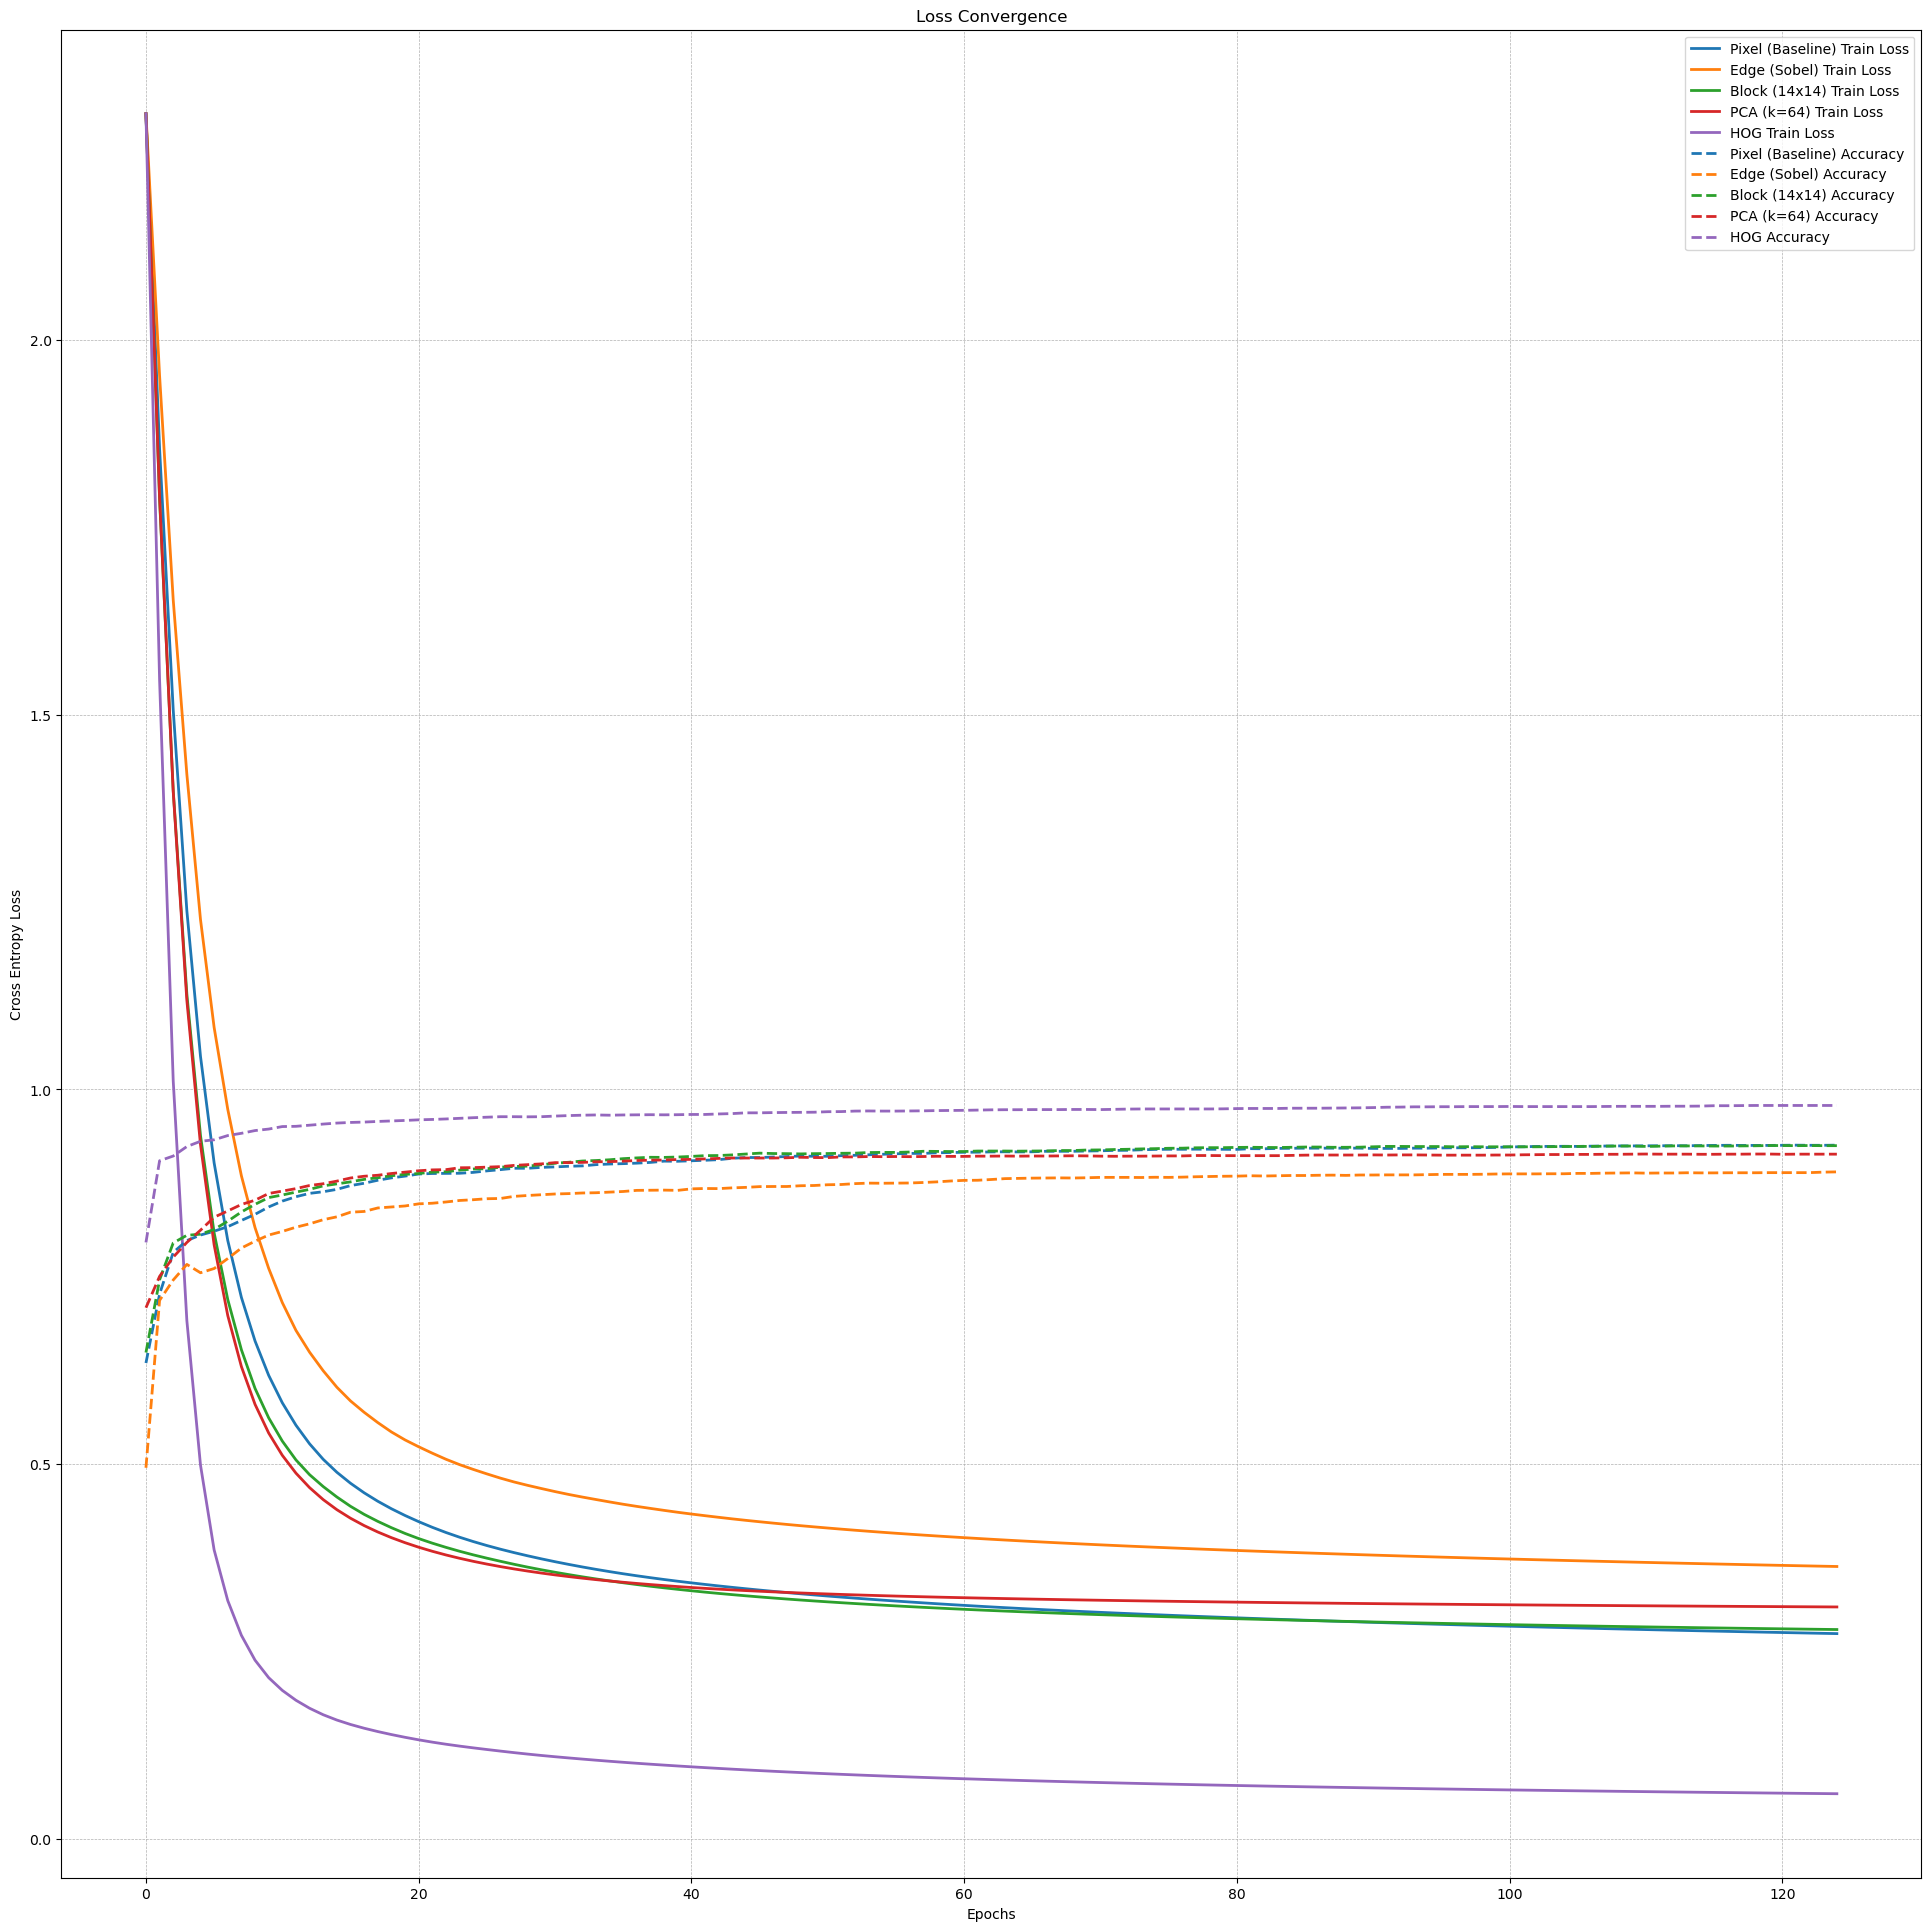

In [12]:
plt.figure(figsize=(24, 24))

# Tạo bảng màu duy nhất cho từng model
model_names = train_loss.keys()
colors = plt.cm.tab10(range(len(model_names)))
color_map = dict(zip(model_names, colors))     

# Plot train loss
for idx, (name, loss_hist) in enumerate(train_loss.items()):
    plt.plot(loss_hist, 
             label=f"{name} Train Loss", 
             linewidth=2,
             color=color_map[name])

# Plot validation loss
for idx, (name, loss_hist) in enumerate(valid_loss.items()):
    plt.plot(loss_hist, 
             label=f"{name} Accuracy", 
             linewidth=2,
             linestyle='--',      
             color=color_map[name]) 

plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Loss Convergence')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

,Model,Accuracy,Precision,Recall,F1-Score,Time (s),Num Features
4,HOG,0.977600,0.977514,0.977581,0.977529,62.142537,441
0,Pixel (Baseline),0.923900,0.923092,0.922909,0.922832,19.473998,784
2,Block (14x14),0.921400,0.920463,0.920347,0.920282,10.081466,196
3,PCA (k=64),0.916000,0.914946,0.914868,0.914792,7.052746,64
1,Edge (Sobel),0.890200,0.889444,0.888636,0.888675,39.136892,784


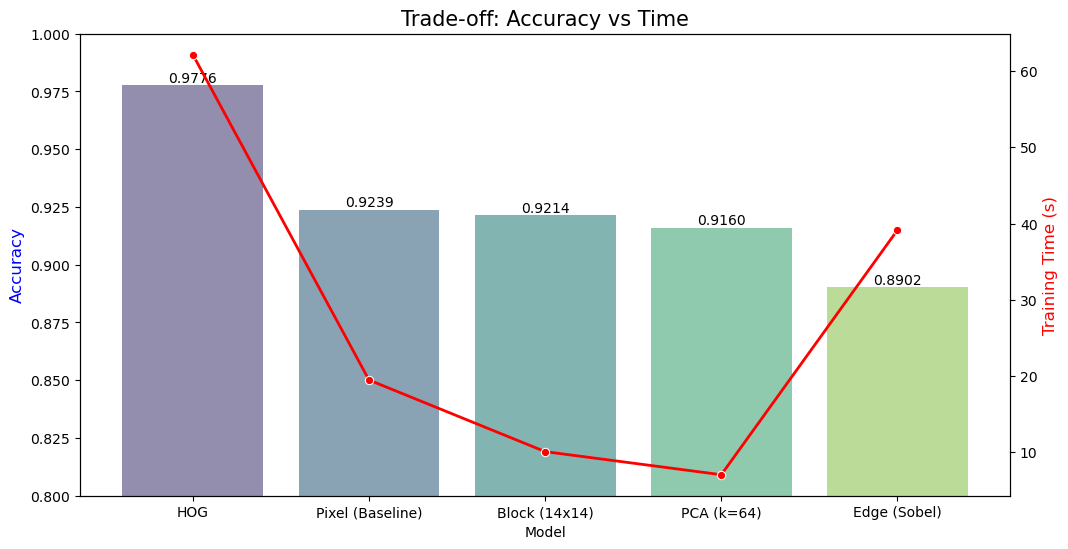

In [13]:
df_results = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
display(df_results.style.background_gradient(cmap='Reds', subset=["Accuracy"]))

# Plot Accuracy vs Time
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for Accuracy
sns.barplot(data=df_results, x='Model', y='Accuracy', hue='Model', ax=ax1, palette='viridis', alpha=0.6, legend=False
)
ax1.set_ylabel('Accuracy', color='blue', fontsize=12)
ax1.set_ylim(0.8, 1.0)
for i in ax1.containers:
    ax1.bar_label(i, fmt='%.4f')

# Line chart for Training Time
ax2 = ax1.twinx()
sns.lineplot(data=df_results, x='Model', y='Time (s)', ax=ax2, color='red', marker='o', linewidth=2)
ax2.set_ylabel('Training Time (s)', color='red', fontsize=12)

plt.title('Trade-off: Accuracy vs Time', fontsize=15)
plt.show()

In [14]:
# Detailed Classification Report for Selected Models
compare_list = ["Pixel (Baseline)", "HOG", "PCA (k=64)", "Edge (Sobel)", "Block (14x14)"]

for name in compare_list:
    if name in models:
        y_pred = models[name].predict(X_test)
        print_class_report(y_test, y_pred, name)


==================== DETAILED REPORT: Pixel (Baseline) ====================
Class  | Precision  | Recall     | F1-Score  
----------------------------------------------
0      | 0.9522     | 0.9755     | 0.9637
1      | 0.9669     | 0.9771     | 0.9720
2      | 0.9327     | 0.8857     | 0.9085
3      | 0.9049     | 0.9139     | 0.9094
4      | 0.9227     | 0.9358     | 0.9292
5      | 0.9083     | 0.8666     | 0.8870
6      | 0.9328     | 0.9562     | 0.9443
7      | 0.9303     | 0.9212     | 0.9257
8      | 0.8711     | 0.8953     | 0.8830
9      | 0.9091     | 0.9019     | 0.9055
----------------------------------------------

==================== DETAILED REPORT: HOG ====================
Class  | Precision  | Recall     | F1-Score  
----------------------------------------------
0      | 0.9749     | 0.9898     | 0.9823
1      | 0.9859     | 0.9841     | 0.9850
2      | 0.9796     | 0.9767     | 0.9782
3      | 0.9753     | 0.9782     | 0.9768
4      | 0.9787     | 0.9817     | 0.9

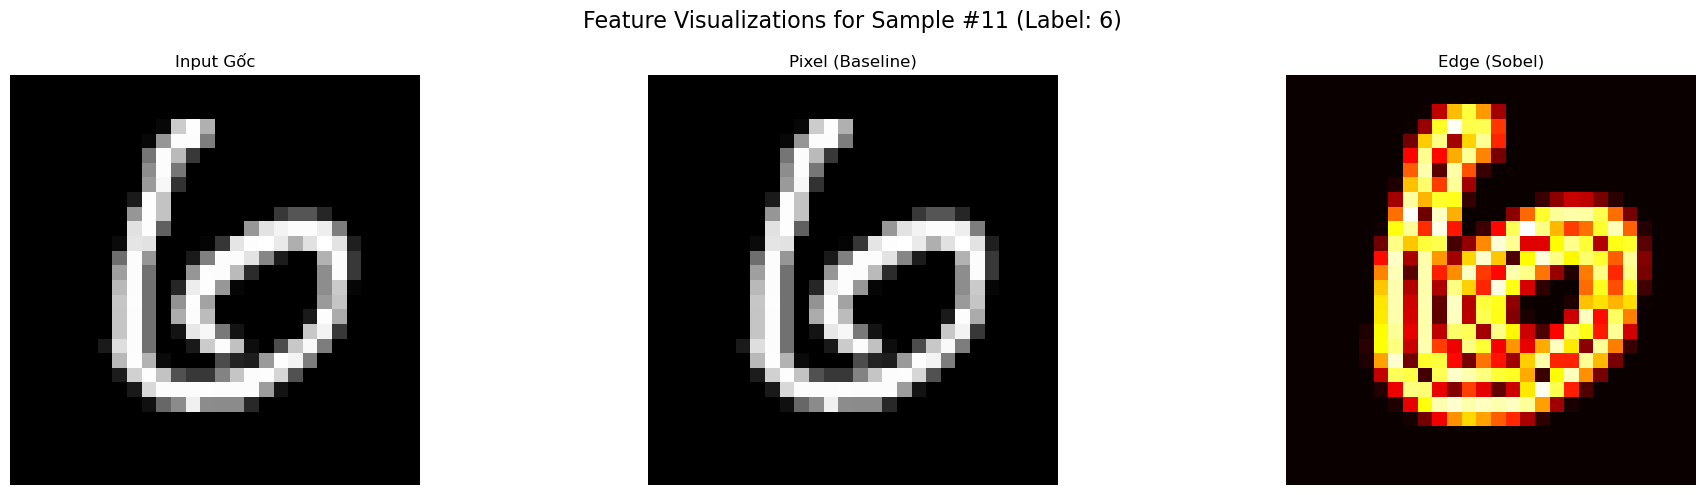

In [15]:
sample_idx = 11  
sample_img = X_test[sample_idx]
sample_label = y_test[sample_idx]

feature_models = ["Pixel (Baseline)", "Edge (Sobel)"]

plt.figure(figsize=(20, 5))
plt.suptitle(f"Feature Visualizations for Sample #{sample_idx} (Label: {sample_label})", fontsize=16)

ax0 = plt.subplot(1, len(feature_models) + 1, 1)
ax0.imshow(sample_img.reshape(28, 28), cmap='gray')
ax0.set_title("Input Gốc")
ax0.axis('off')

for i, name in enumerate(feature_models):
    if name in models:
        ax = plt.subplot(1, len(feature_models) + 1, i + 2)
        
        model_instance = models[name]
        viz_data = model_instance.get_feature_visualization(sample_img)
        
        cmap_type = 'hot' if 'HOG' in name or 'Edge' in name else 'gray'
        
        ax.imshow(viz_data, cmap=cmap_type)
        ax.set_title(f"{name}")
        ax.axis('off')

plt.tight_layout()
plt.show()

Visualizing PCA Features...


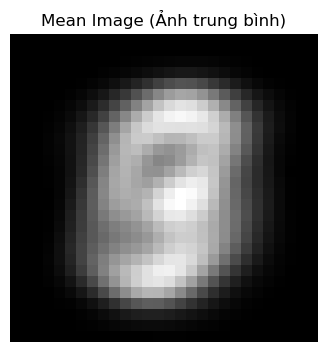

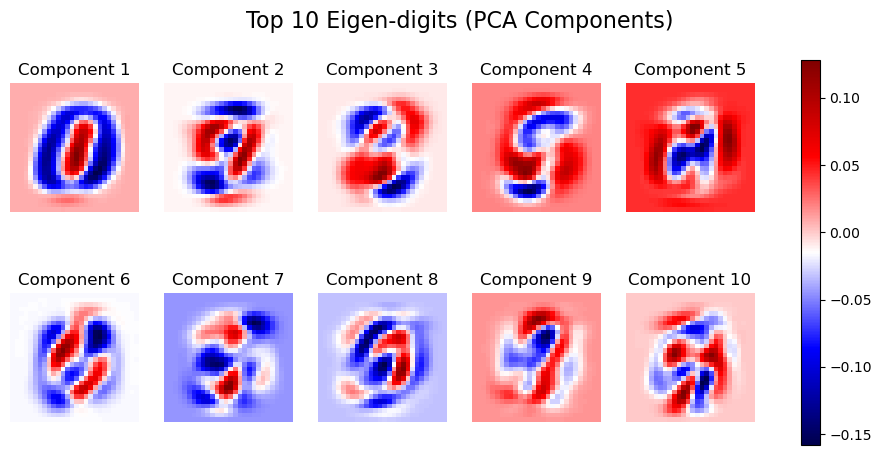

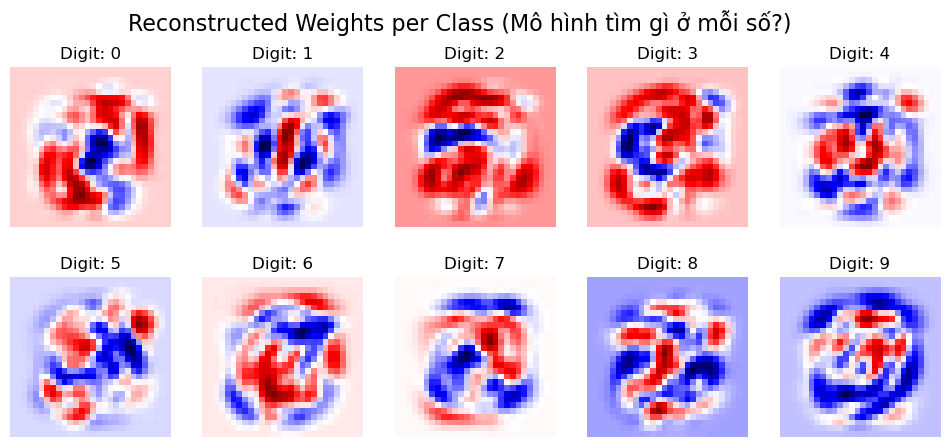

Visualizing HOG Features...


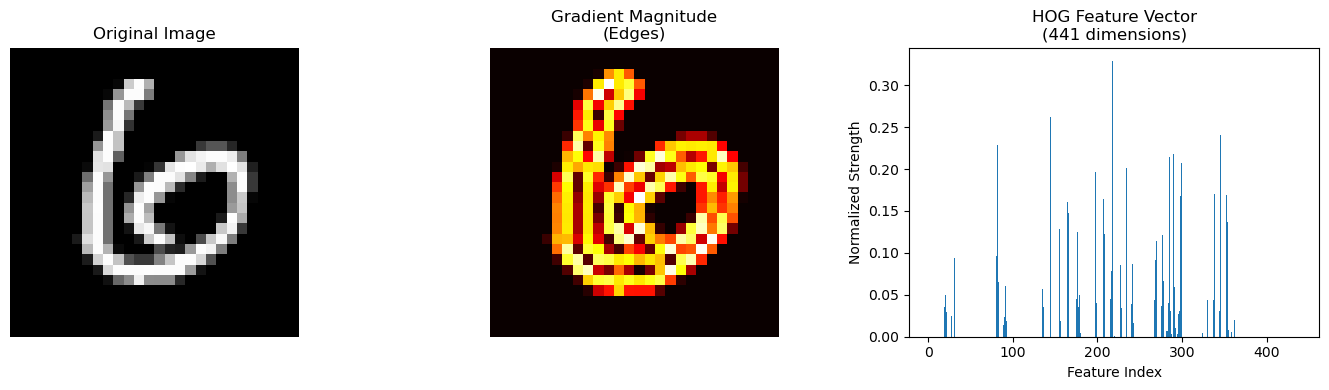

Visualizing Block Features...


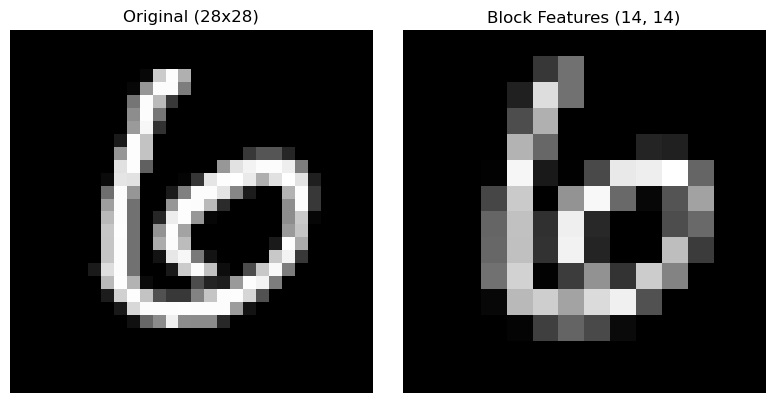

In [16]:
# Visualize feature representations for analysis
pca_model = models["PCA (k=64)"]
print("Visualizing PCA Features...")
visualize_PCA_features(pca_model) 

sample_idx = 11

hog_model = models["HOG"]
print("Visualizing HOG Features...")
visualize_hog_features(hog_model, X_test[sample_idx])

block_model = models["Block (14x14)"]
print("Visualizing Block Features...")
visualize_block_features(block_model, X_test[sample_idx])


==================== CONFUSION MATRIX COMPARISON ====================
Model: Pixel (Baseline)


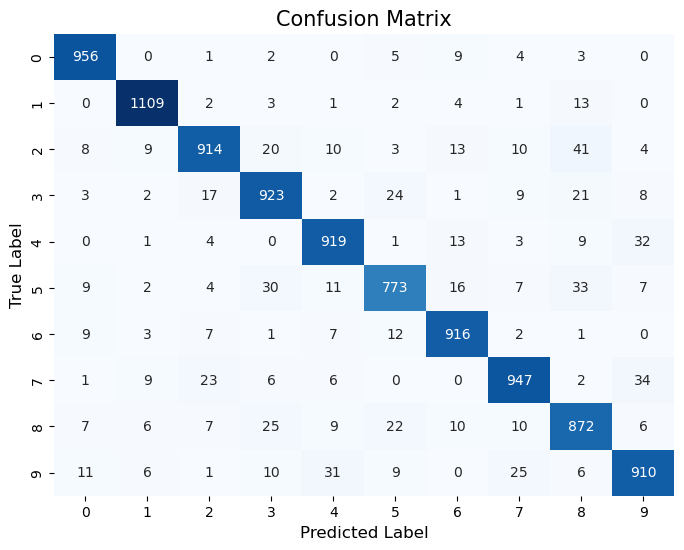

Model: PCA (k=64)


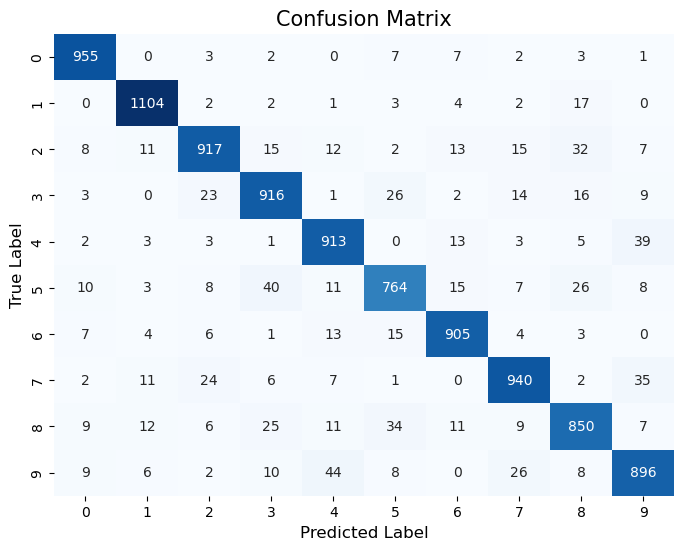

Model: HOG


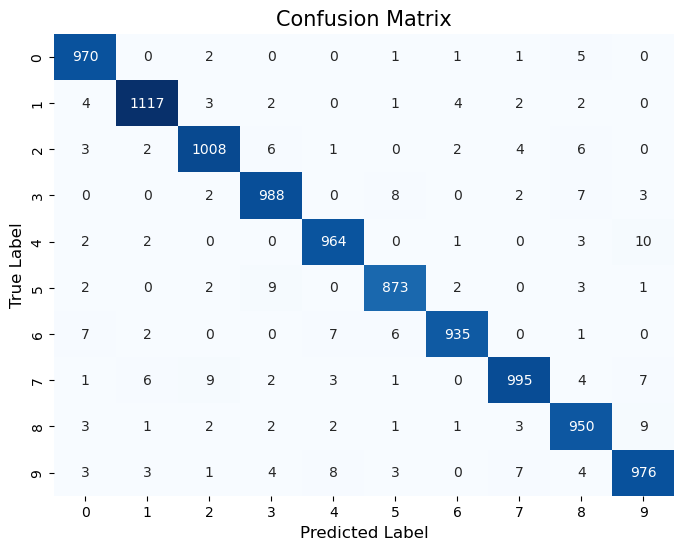

Model: Edge (Sobel)


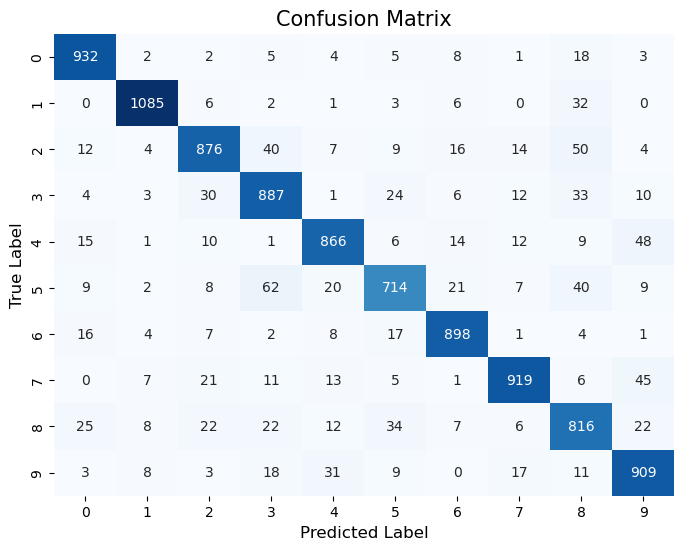

Model: Block (14x14)


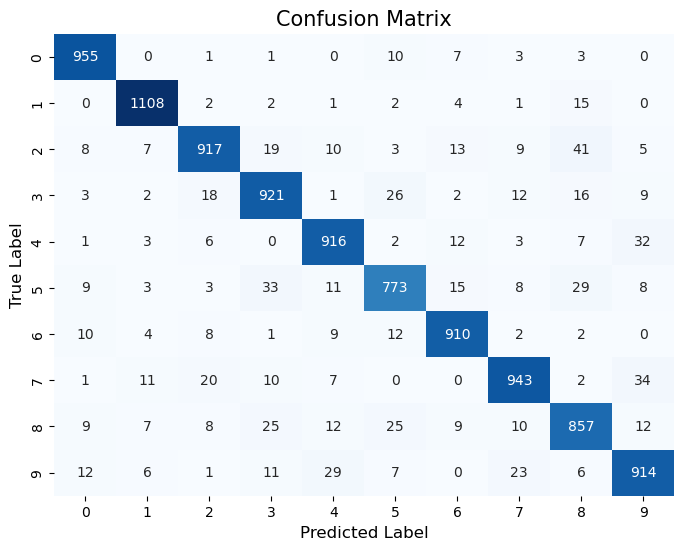

In [17]:
compare_models = ["Pixel (Baseline)", "PCA (k=64)", "HOG", "Edge (Sobel)", "Block (14x14)"]

print(f"\n{'='*20} CONFUSION MATRIX COMPARISON {'='*20}")

for name in compare_models:
    if name in models:
        y_pred = models[name].predict(X_test)
        cm = confusion_matrix(y_test, y_pred, num_classes=10)
        print(f"Model: {name}")
        plot_confusion_matrix(cm, class_names=[str(i) for i in range(10)])

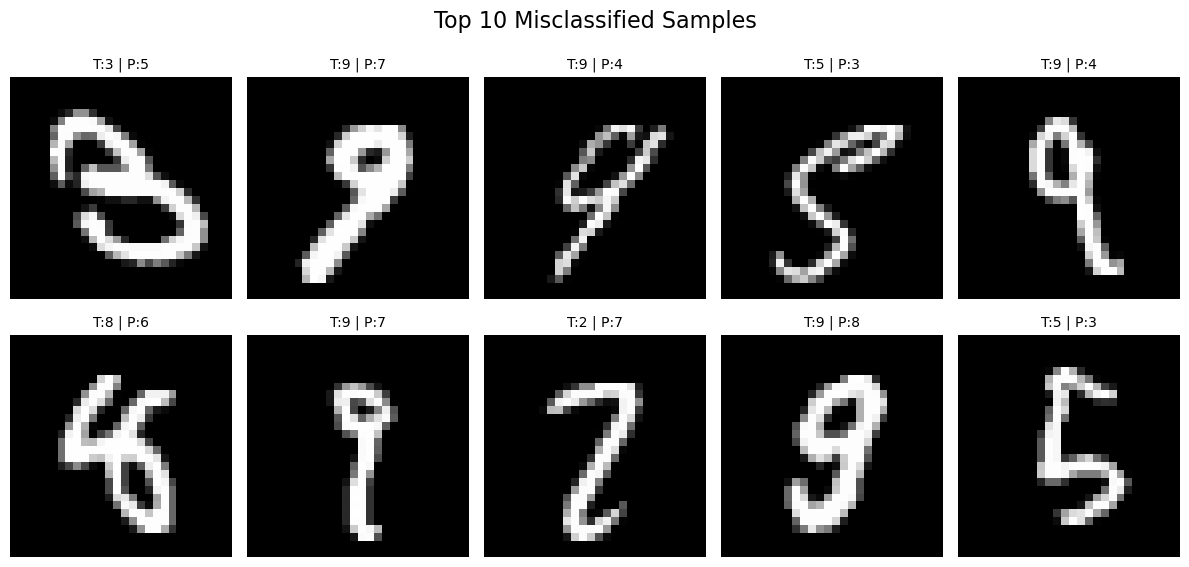

In [18]:
best_model_name = max(results, key=lambda x: x['Accuracy'])['Model']
best_model = models[best_model_name]
y_pred = best_model.predict(X_test)

# Find indices of wrong predictions
wrong_indices = np.where(y_pred != y_test)[0]

num_show = 10
rows, cols = 2, 5

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
fig.suptitle("Top 10 Misclassified Samples", fontsize=16)

for i in range(num_show):
    idx = wrong_indices[i]
    img = X_test[idx]
    true_label = y_test[idx]
    pred_label = y_pred[idx]

    row = i // cols
    col = i % cols

    axes[row, col].imshow(img.reshape(28, 28), cmap='gray')
    axes[row, col].set_title(f"T:{true_label} | P:{pred_label}", fontsize=10)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()